## Data Loading and Processing

In [23]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows',10)

In [25]:
data = pd.read_csv('./data/movie_dataset.csv')
data.head(4)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [47]:
import string 
import nltk
import re

In [52]:
def text_processing(title):
    title = str(title)
    title = title.lower()
    #Removing punctuation from the text
    title = "".join([w for w in title if w not in string.punctuation])
    
    #Removing html tags
    html = re.compile('<.*?>')
    title = re.sub(html," ",title)
    
    #Tokenizing the text
    title = re.split('\W+',title)
    
    #Removing stopwords and Lemmatizing
    stop_words = nltk.corpus.stopwords.words('english')
    wn = nltk.WordNetLemmatizer()
    
    title = [w for w in title if w not in stop_words]
    title = " ".join([wn.lemmatize(x) for x in title])
    
    return title

In [55]:
data['keywords'] = data.keywords.apply(lambda x: text_processing(x))
data['overview'] = data.overview.apply(lambda x: text_processing(x))

## Wordcloud Representation

In [60]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import matplotlib.pyplot as plt

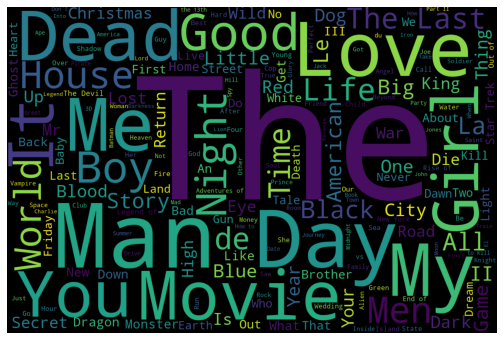

In [69]:
text = " ".join(data.original_title)
word_cloud = WordCloud(width=1200,height=800,max_words=200,stopwords=STOPWORDS,
                       background_color='black',random_state=25).generate(text)

plt.figure(figsize=(10,6))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [70]:
# Creating a DataFarme for the slected columns
dx = data[['index','genres','keywords','cast','director','overview']]
dx = dx.fillna('')
dx.isnull().sum()

index       0
genres      0
keywords    0
cast        0
director    0
overview    0
dtype: int64

In [71]:
dx.head()

,index,genres,keywords,cast,director,overview
0,0,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron,22nd century paraplegic marine dispatched moon...
1,1,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski,captain barbossa long believed dead come back ...
2,2,Action Adventure Crime,spy based novel secret agent sequel mi6,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes,cryptic message bond past sends trail uncover ...
3,3,Action Crime Drama Thriller,dc comic crime fighter terrorist secret identi...,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan,following death district attorney harvey dent ...
4,4,Action Adventure Science Fiction,based novel mar medallion space travel princess,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton,john carter warweary former military captain w...


In [74]:
def feature_combine(row):
    return row['keywords']+" "+row['genres']+" "+row['cast']+" "+row['director']+" "+row['overview']

dx['combined'] = dx.apply(feature_combine,axis=1)
dx.head()

,index,genres,keywords,cast,director,overview,combined
0,0,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron,22nd century paraplegic marine dispatched moon...,culture clash future space war space colony so...
1,1,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski,captain barbossa long believed dead come back ...,ocean drug abuse exotic island east india trad...
2,2,Action Adventure Crime,spy based novel secret agent sequel mi6,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes,cryptic message bond past sends trail uncover ...,spy based novel secret agent sequel mi6 Action...
3,3,Action Crime Drama Thriller,dc comic crime fighter terrorist secret identi...,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan,following death district attorney harvey dent ...,dc comic crime fighter terrorist secret identi...
4,4,Action Adventure Science Fiction,based novel mar medallion space travel princess,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton,john carter warweary former military captain w...,based novel mar medallion space travel princes...


## Apply Tf-idf Vectorizer and Cosine Similarity

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [79]:
tfidf = TfidfVectorizer()
frequency_matrix = tfidf.fit_transform(dx['combined'])
similarity_matrix = cosine_similarity(frequency_matrix)
print(similarity_matrix)

[[1.         0.01737808 0.02178409 ... 0.01162038 0.02170698 0.        ]
 [0.01737808 1.         0.01703354 ... 0.02755608 0.         0.00371523]
 [0.02178409 0.01703354 1.         ... 0.01307508 0.04108898 0.        ]
 ...
 [0.01162038 0.02755608 0.01307508 ... 1.         0.00945976 0.02259974]
 [0.02170698 0.         0.04108898 ... 0.00945976 1.         0.00264427]
 [0.         0.00371523 0.         ... 0.02259974 0.00264427 1.        ]]


In [80]:
def get_movie_index(movie):
    return data[data['original_title'] == movie]['index'].values[0]
def get_title_from_index(inp):
    return data[data['index'] == inp]['original_title'].values[0]

## Testing for a random movie

In [89]:
movie = 'Avatar'
movie_index = get_movie_index(movie)
similar_movies = np.array(sorted(list(enumerate(x[movie_index])),key=lambda x:x[1],reverse=True))
similar_movies = similar_movies[1:51,0]
list(similar_movies)

[2403.0,
 1914.0,
 56.0,
 94.0,
 1352.0,
 1531.0,
 2198.0,
 3158.0,
 461.0,
 2696.0,
 239.0,
 1053.0,
 305.0,
 3604.0,
 1354.0,
 4593.0,
 1275.0,
 4332.0,
 2229.0,
 47.0,
 942.0,
 432.0,
 4401.0,
 838.0,
 1245.0,
 3105.0,
 300.0,
 549.0,
 43.0,
 158.0,
 1951.0,
 3668.0,
 541.0,
 52.0,
 342.0,
 1318.0,
 661.0,
 539.0,
 150.0,
 2934.0,
 1922.0,
 2995.0,
 3730.0,
 1759.0,
 278.0,
 373.0,
 311.0,
 1473.0,
 740.0,
 1341.0]

In [90]:
movie_names = []
for element in similar_movies:
    movie_names.append(get_title_from_index(element))

In [91]:
movie_names

['Aliens',
 'Lifeforce',
 'Star Trek Beyond',
 'Guardians of the Galaxy',
 'Gattaca',
 'Moonraker',
 'Lockout',
 'Alien',
 'Lost in Space',
 'Jason X',
 'Gravity',
 'Galaxy Quest',
 'Treasure Planet',
 'Apollo 18',
 'Space Chimps',
 'Trekkies',
 'Sunshine',
 'Silent Running',
 'Machete Kills',
 'Star Trek Into Darkness',
 'The Book of Life',
 'Deep Impact',
 'The Helix... Loaded',
 'Alien³',
 'Colombiana',
 'Imaginary Heroes',
 'Starship Troopers',
 'Sphere',
 'Terminator Salvation',
 'Star Trek',
 'Белка и Стрелка. Звёздные собаки',
 'Capricorn One',
 'Soldier',
 'Transformers: Dark of the Moon',
 'Men in Black',
 'The Thing',
 'Zathura: A Space Adventure',
 'Titan A.E.',
 'Men in Black II',
 'Invaders from Mars',
 'Gettysburg',
 'Mad Max Beyond Thunderdome',
 'Cargo',
 'The Right Stuff',
 'Planet of the Apes',
 'Mission to Mars',
 'The Adventures of Pluto Nash',
 "The Astronaut's Wife",
 'Alien: Resurrection',
 'Obitaemyy Ostrov']